# complex_counts for PR8

In [2]:
library(tidyverse)

In [3]:
install.packages("UpSetR")
library(UpSetR)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(grid)

In [5]:
theme_set(theme_light())
options(repr.plot.res=300, repr.plot.height=4)

## Load spot data

In [7]:
spots <- read_csv("data/all_spots.csv", col_types = cols(), na = "")
spots <- spots %>% select(rep, hpi, fov, y, x, radius, spot_id, xc, yc, target, nucleus, cell)
spots

rep,hpi,fov,y,x,radius,spot_id,xc,yc,target,nucleus,cell
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
0,0,1,1217,1157,4,0,0.01672416,0.02960153,"PB2,PA",FALSE,51
0,0,1,1078,482,3,1,0.01665461,0.02958721,M,TRUE,43
0,0,1,1201,1089,4,2,0.01671715,0.02959988,NA,FALSE,51
0,0,1,678,868,3,3,0.01669438,0.02954600,NA,TRUE,24
0,0,1,132,918,4,4,0.01669953,0.02948974,M(invalid),TRUE,5
0,0,1,794,1636,4,5,0.01677351,0.02955795,PA,FALSE,27
0,0,1,802,941,3,6,0.01670190,0.02955877,NA,FALSE,35
0,0,1,774,1236,3,7,0.01673230,0.02955589,missing,TRUE,33
0,0,1,461,689,4,8,0.01667594,0.02952364,PB1,FALSE,24


In [8]:
count(spots, target=="missing")

"target == ""missing""",n
<lgl>,<int>
FALSE,2469358
TRUE,2829919


With old pipeline: False = 1716318, True = 1167447

## QC: total spots and missing percentage per tile

In [9]:
spot_counts <- spots %>%
	group_by(rep, hpi, fov, nucleus) %>%
	count(missing=target=="missing") %>%
	pivot_wider(names_from = missing, values_from = n) %>%
	transmute(rep, hpi, fov, nucleus, total=`FALSE`+`TRUE`, missing_percent=`TRUE`/total) %>%
	left_join(
		spots %>%
		group_by(rep, hpi, fov, nucleus) %>%
		count(invalid=str_detect(target,"invalid")) %>%
		pivot_wider(names_from = invalid, values_from = n) %>%
		transmute(rep, hpi, fov, nucleus, invalid_percent=`TRUE`/(`TRUE`+`FALSE`)),
		by=c("rep", "hpi", "fov", "nucleus")
	)
spot_counts %>% glimpse

Rows: 916
Columns: 7
Groups: rep, hpi, fov, nucleus [916]
$ rep             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ hpi             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ fov             <dbl> 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, …
$ nucleus         <lgl> FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, FA…
$ total           <int> 1219, 418, 1164, 403, 682, 208, 871, 326, 971, 391, 99…
$ missing_percent <dbl> 0.3125513, 0.3468900, 0.2654639, 0.4342432, 0.2419355,…
$ invalid_percent <dbl> 0.013125513, 0.004784689, 0.007731959, 0.024813896, 0.…


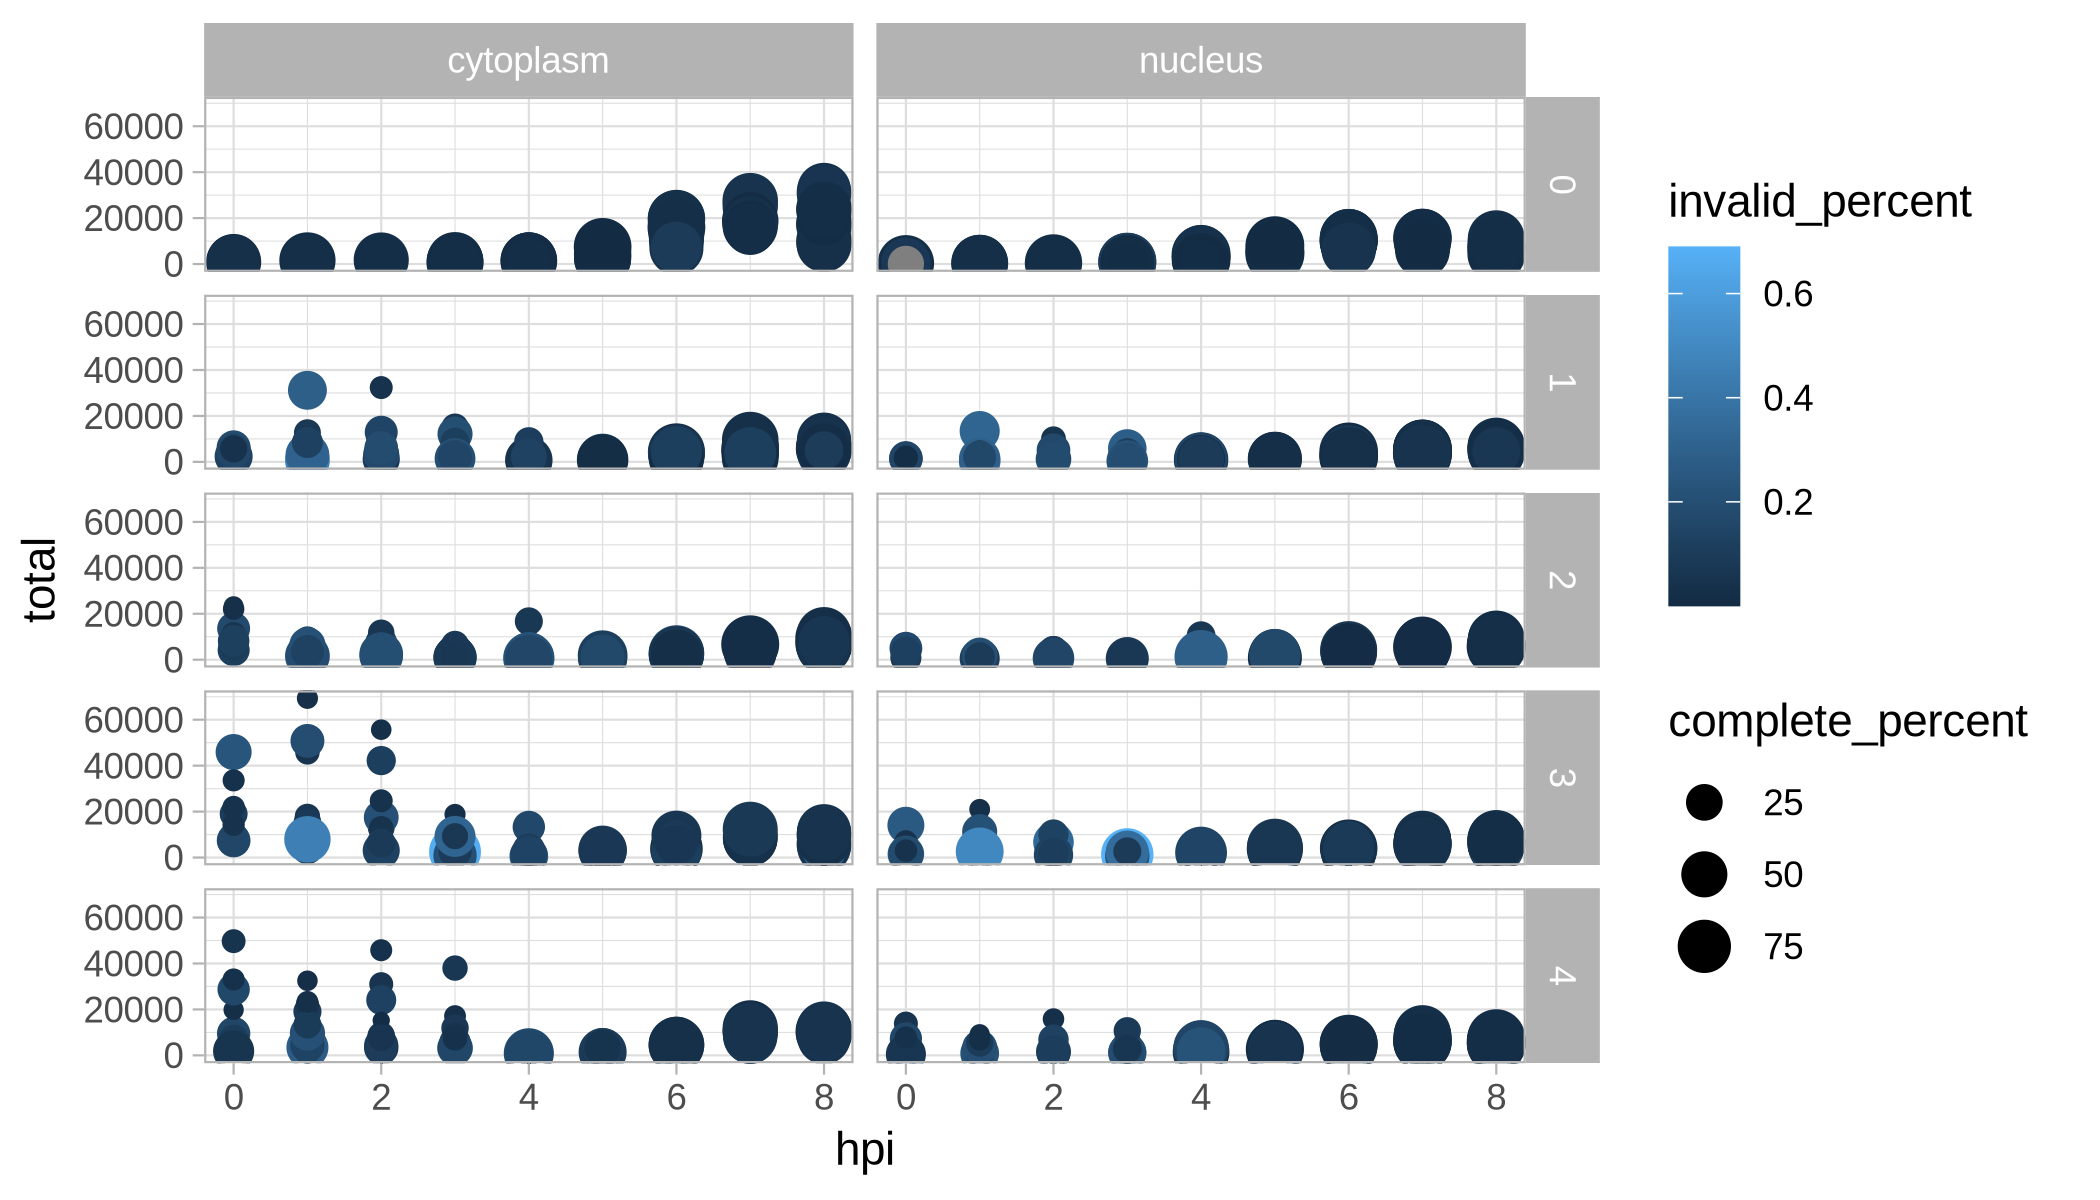

In [10]:
spot_counts %>%
	mutate(
		complete_percent=100*(1-missing_percent),
		missing_percent=100*missing_percent,
		nucleus=if_else(nucleus, "nucleus", "cytoplasm")
	) %>%
	ggplot(aes(x=hpi, y=total, size=complete_percent, color=invalid_percent)) +
	geom_point() +
	facet_grid(rep~nucleus)

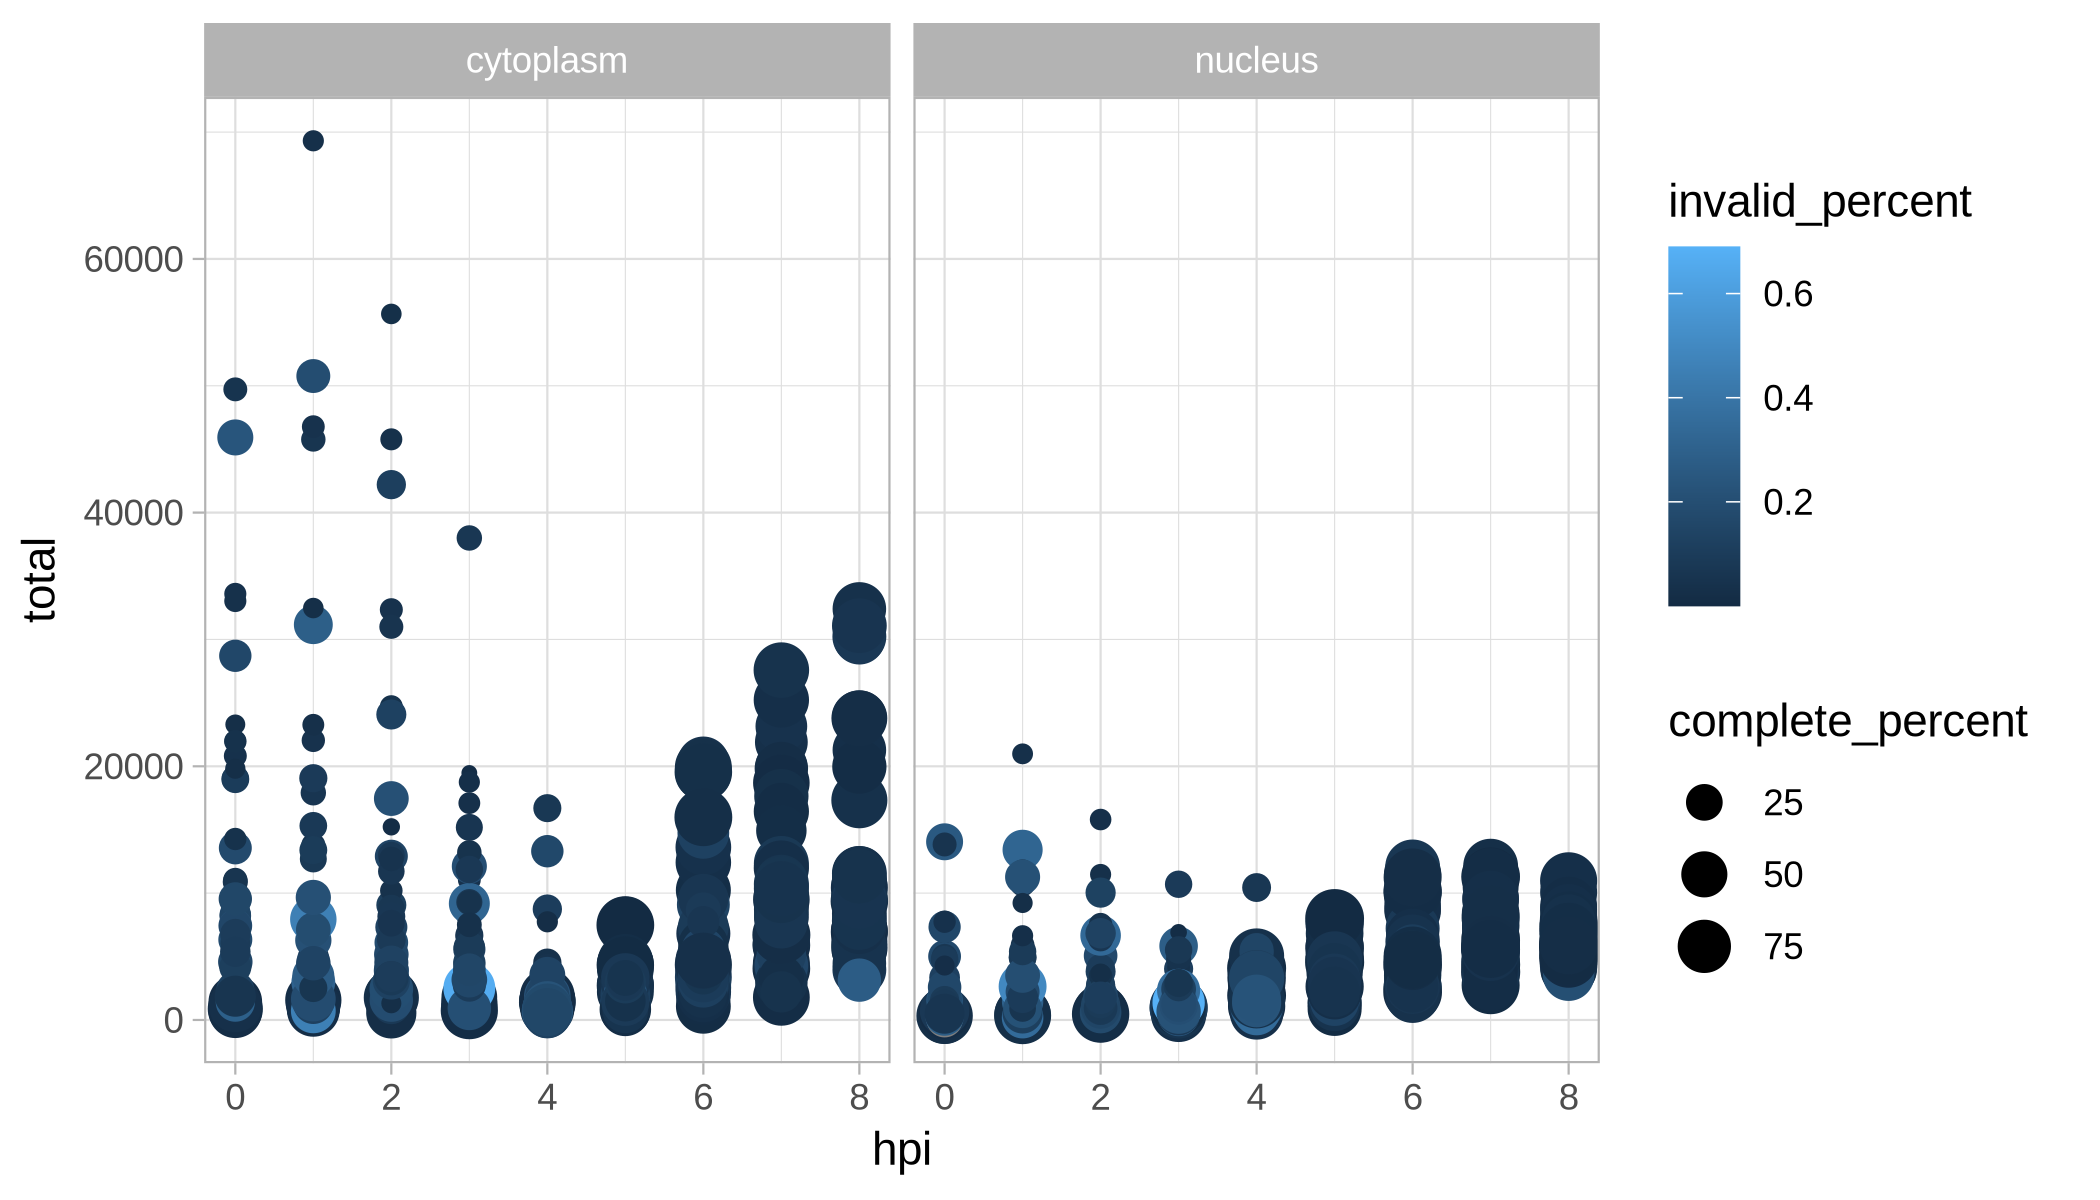

In [11]:
spot_counts %>%
	mutate(
		complete_percent=100*(1-missing_percent),
		missing_percent=100*missing_percent,
		nucleus=if_else(nucleus, "nucleus", "cytoplasm")
	) %>%
	ggplot(aes(x=hpi, y=total, size=complete_percent, color=invalid_percent)) +
	geom_point() +
	facet_grid(.~nucleus)

## Filter spots

In [12]:
valid_spots <- spots %>%
	filter(target!="missing", !str_detect(target, "invalid"))

In [13]:
valid_spots %>% count(target, sort=T) %>% head(12)

target,n
<chr>,<int>
"M,NS",225665
M,202316
NA,168376
PB2,130295
PA,101566
"PB2,PB1,PA",87472
"HA,NP,NA",85929
HA,80379
NS,56859


Important TODOs 📝
- normalize by cell count
- avoid multi counts from overlapping tile regions

In [14]:
# to avoid multiple counting of spots in the overlap of tiles, only the top left 90% of each tile are used (this is not the ideal way to do this)
valid_spots <- valid_spots %>% filter(x<=1800, y<=1800)

In [15]:
# to normalize by cell the number of cells per tile are required, should be determined from the mask directly, this approach is only a heuristic
cells <- valid_spots %>% group_by(rep, hpi, fov) %>% summarize(n_cells=max(cell)+1, cells_with_spots=n_distinct(cell))
cells %>% head

`summarise()` has grouped output by 'rep', 'hpi'. You can override using the
`.groups` argument.


rep,hpi,fov,n_cells,cells_with_spots
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0,0,68,65
0,0,1,77,64
0,0,2,41,39
0,0,3,44,39
0,0,4,55,41
0,0,5,58,38


In [16]:
valid_spots <- valid_spots %>% left_join(select(cells, rep, hpi, fov, n_cells))

Joining with `by = join_by(rep, hpi, fov)`


In [17]:
valid_spots <- valid_spots %>%
	mutate(complex_size = str_count(target, ",")+1)

In [18]:
valid_spots %>% group_by(nucleus) %>% count(complex_size)#, sort=T)

nucleus,complex_size,n
<lgl>,<dbl>,<int>
FALSE,1,407031
FALSE,2,280956
FALSE,3,196895
FALSE,4,76012
FALSE,5,29247
FALSE,6,7072
FALSE,7,863
FALSE,8,286
TRUE,1,287267


In [19]:
valid_spots %>% filter(!nucleus) %>% group_by(hpi) %>% count(complex_size)

hpi,complex_size,n
<dbl>,<dbl>,<int>
0,1,8519
0,2,562
0,3,261
0,4,214
0,5,121
0,6,25
0,7,1
1,1,10854
1,2,690


## Complex abundance by rank

In [20]:
install.packages("devtools")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [21]:
library(devtools)

Loading required package: usethis



In [22]:
devtools::install_github("dgrtwo/drlib")
# or
#pak::pkg_install("dgrtwo/drlib")

Skipping install of 'drlib' from a github remote, the SHA1 (1780f937) has not changed since last install.
  Use `force = TRUE` to force installation



In [23]:
library(drlib)


Attaching package: ‘drlib’


The following object is masked from ‘package:tidyr’:

    expand_grid




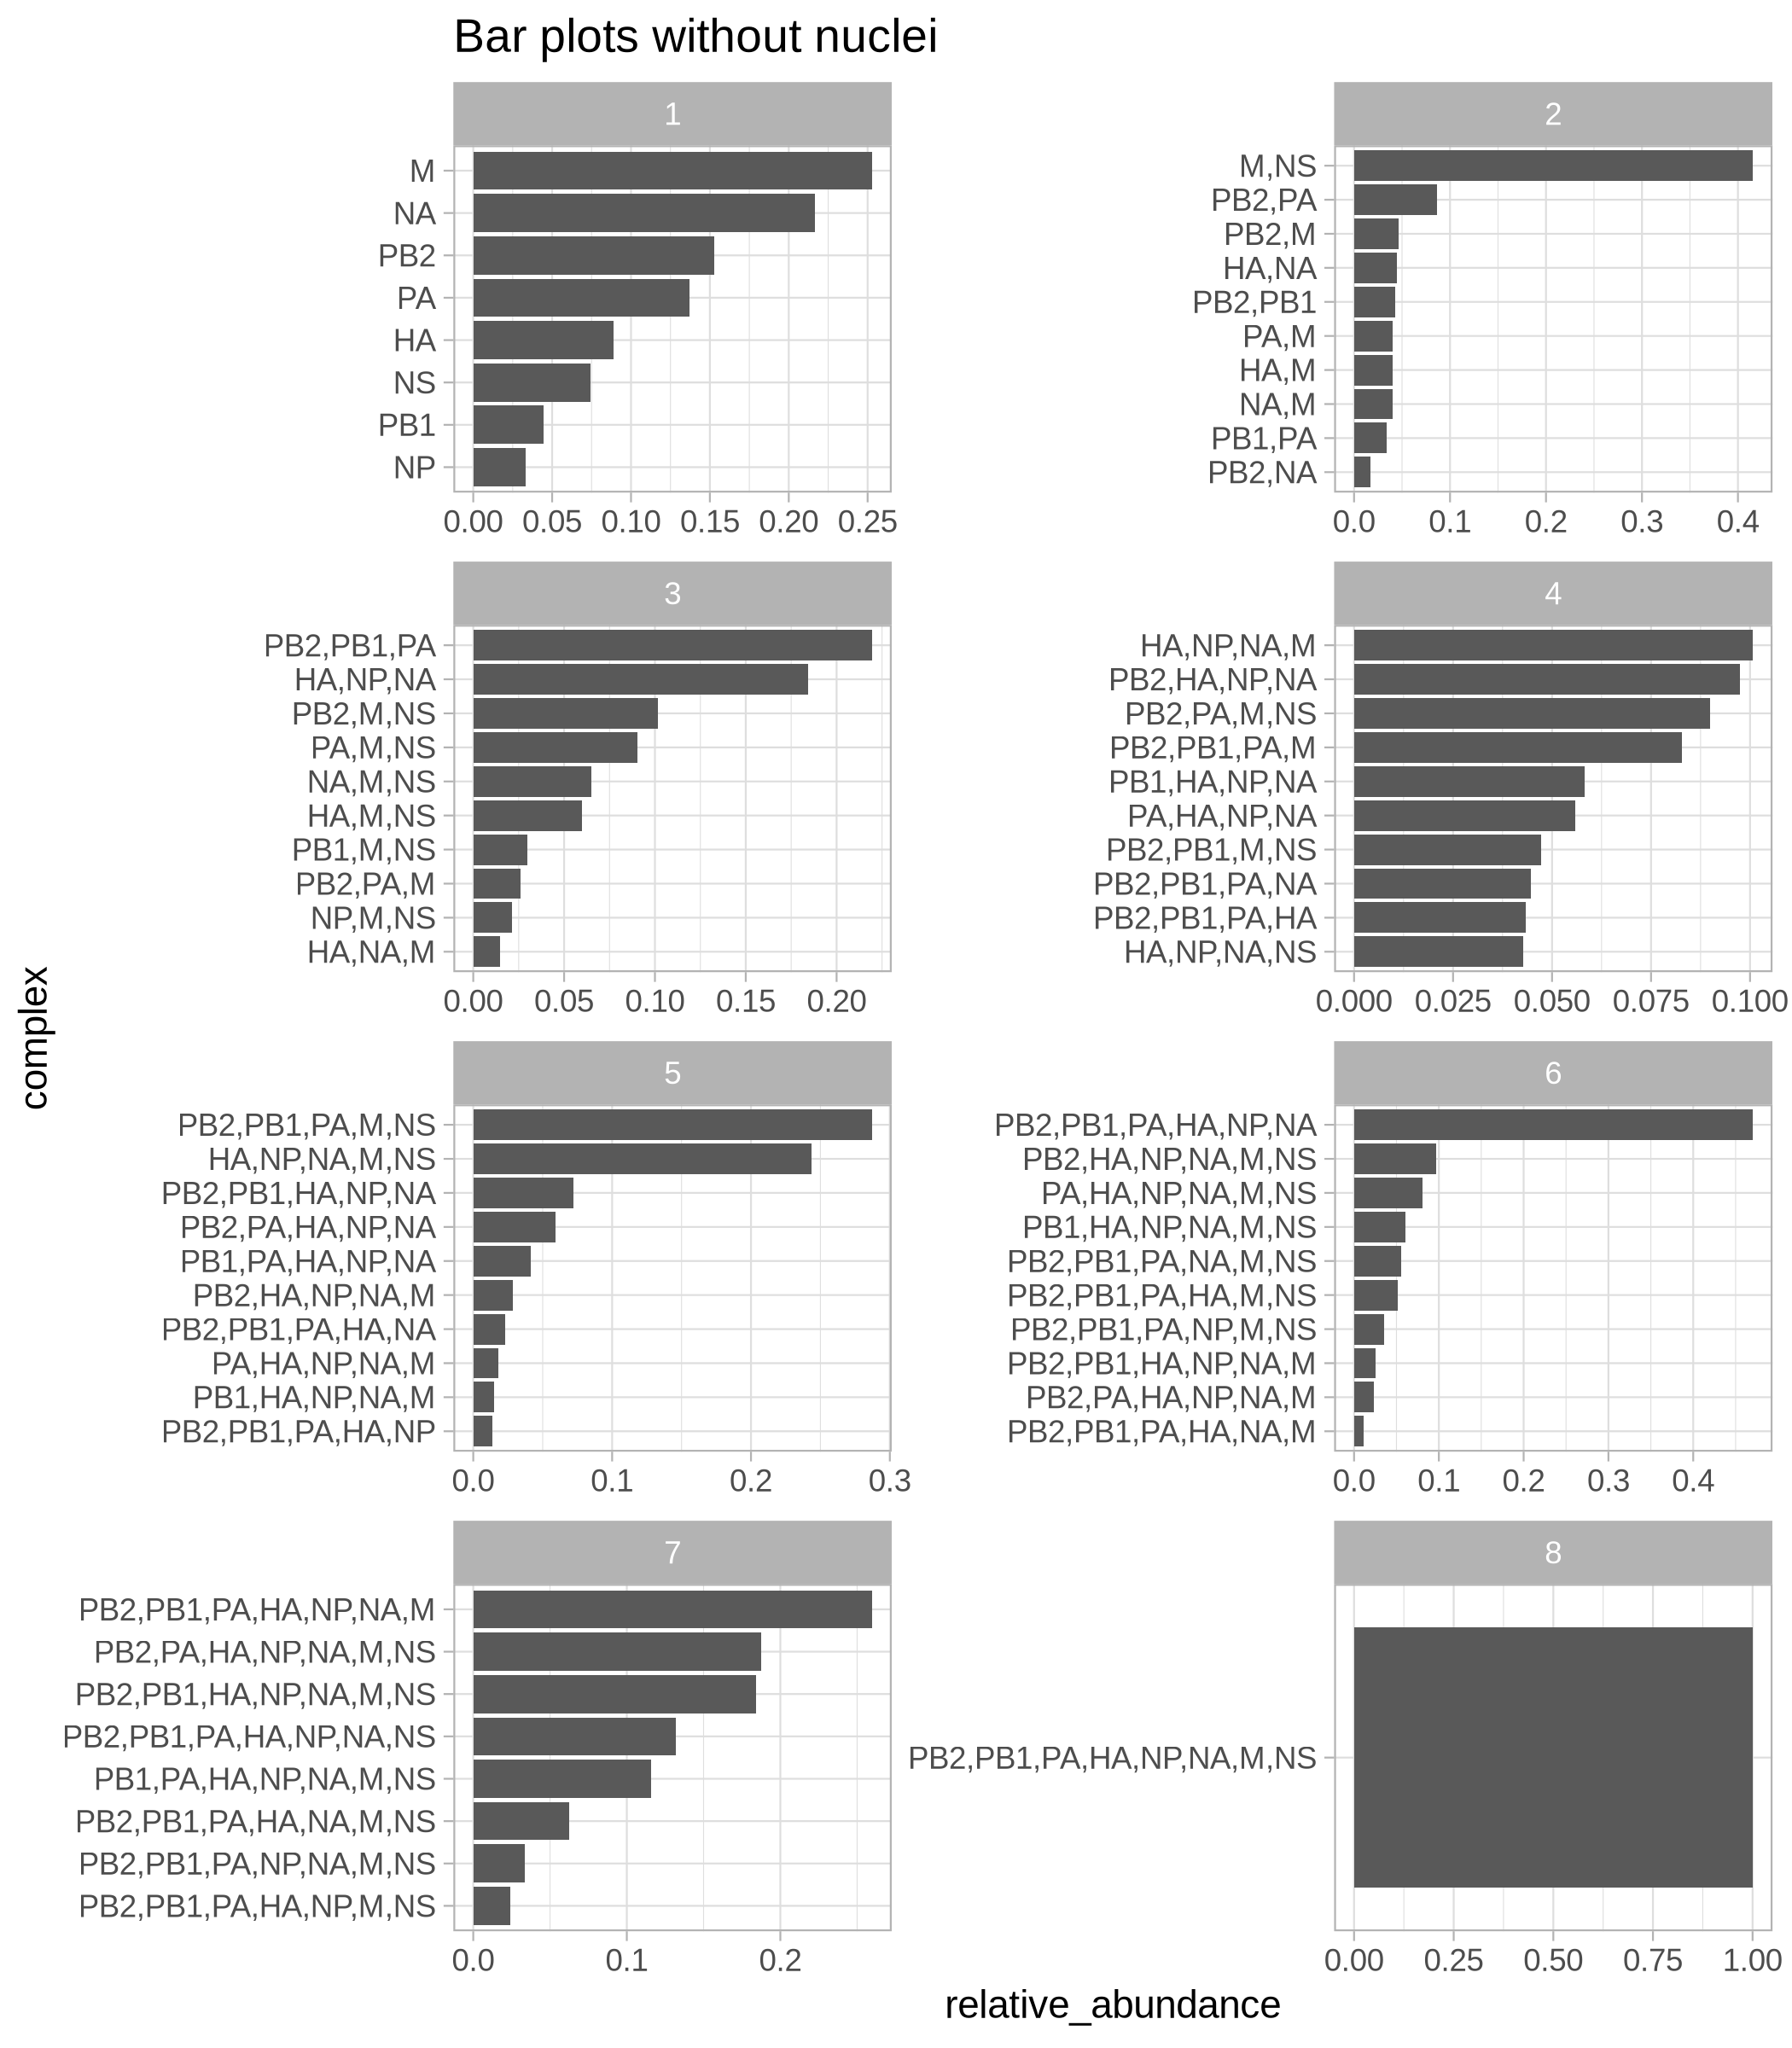

In [24]:
options(repr.plot.height=8)
valid_spots %>%
	#mutate(nucleus=if_else(nucleus, "nucleus", "cytoplasm")) %>%
	filter(!nucleus) %>%
    count(target, complex_size) %>%
	group_by(complex_size) %>%
	mutate(relative_abundance=n/sum(n)) %>%
	top_n(10, relative_abundance) %>%
	mutate(complex=reorder_within(target, relative_abundance, complex_size)) %>%
	ggplot(aes(x=relative_abundance, y=complex)) +
		geom_col() +
		facet_wrap(complex_size~., scales="free", ncol=2) +
		scale_y_reordered() + 
        ggtitle("Bar plots without nuclei")
options(repr.plot.height=4)

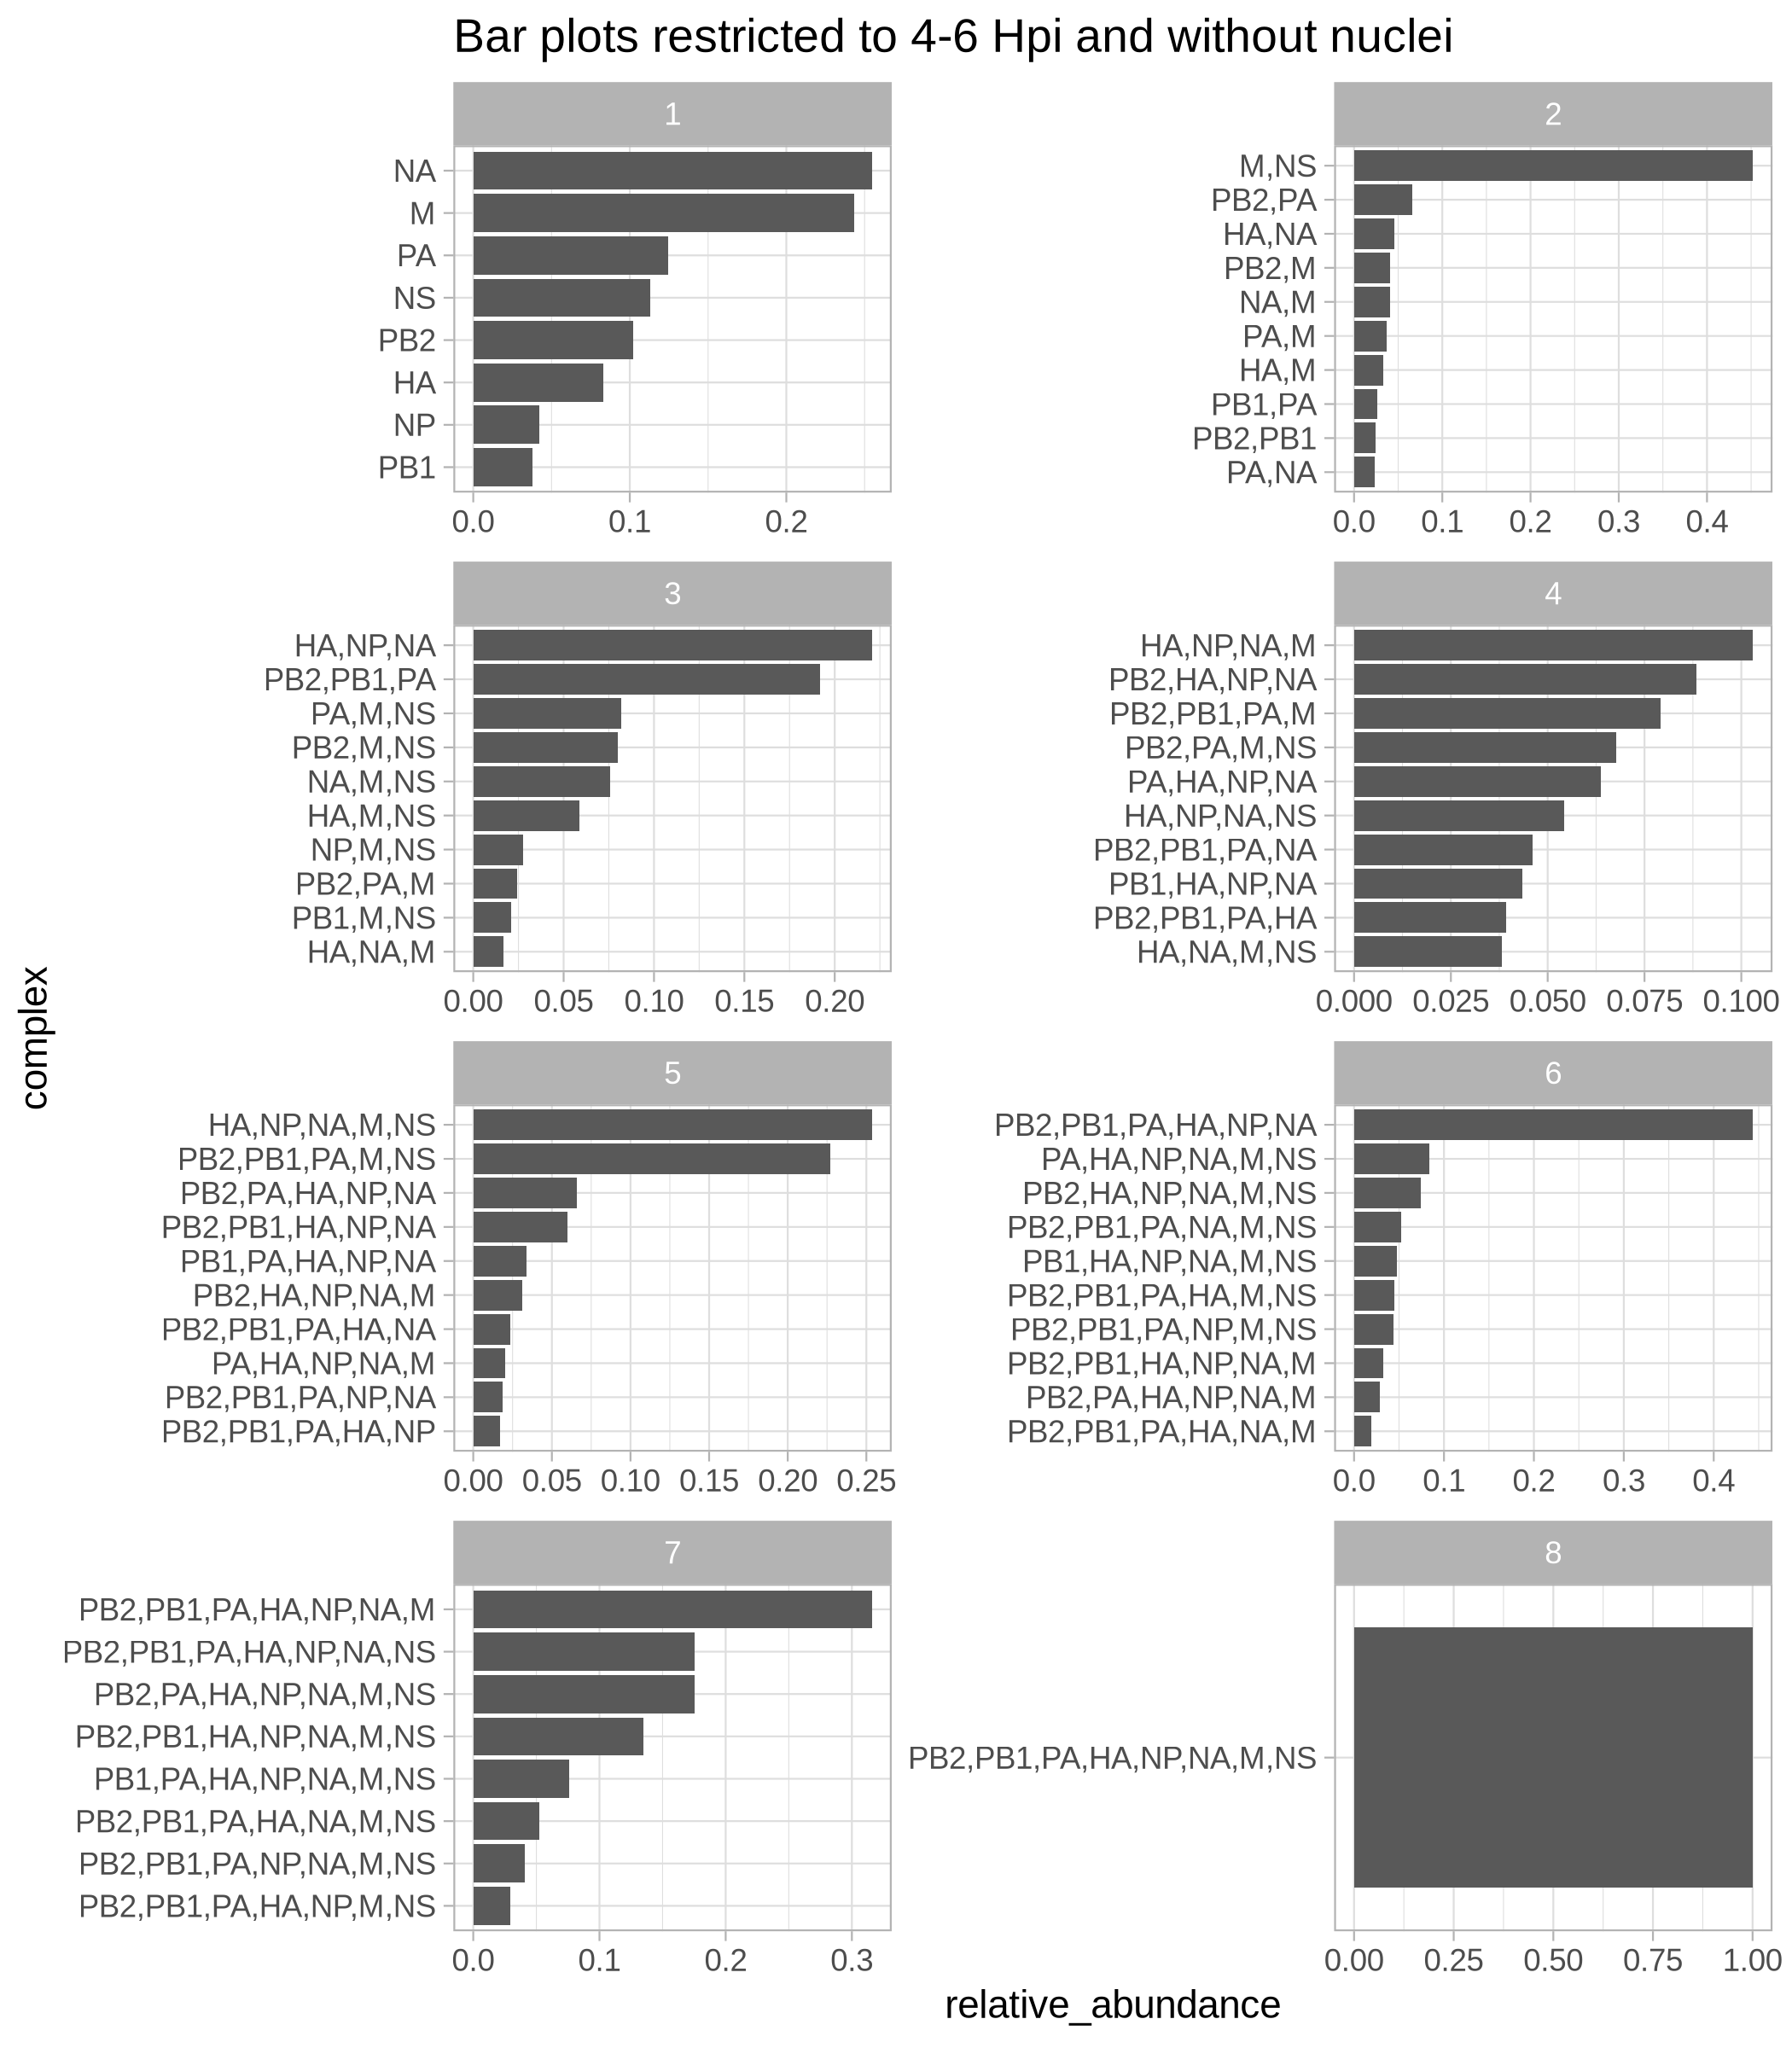

In [25]:
options(repr.plot.height=8)
valid_spots %>%
	#mutate(nucleus=if_else(nucleus, "nucleus", "cytoplasm")) %>%
	filter(hpi >=4, hpi <= 6, !nucleus) %>%
    count(target, complex_size) %>%
	group_by(complex_size) %>%
	mutate(relative_abundance=n/sum(n)) %>%
	top_n(10, relative_abundance) %>%
	mutate(complex=reorder_within(target, relative_abundance, complex_size)) %>%
	ggplot(aes(x=relative_abundance, y=complex)) +
		geom_col() +
		facet_wrap(complex_size~., scales="free", ncol=2) +
		scale_y_reordered() +
        ggtitle("Bar plots restricted to 4-6 Hpi and without nuclei")
options(repr.plot.height=4)